## From biological to artifical neurons

Origin: McCulloch and Pitts' 1943 paper "A Logical Calculus of Ideas Immanent in Nervous Activity". This paper presented a simplified computational model of how biological neurons might work together in animal brains to perform complex computations using propotional logic.

Long winter followed, till the 1980s. In the early 1980s, new architectures were invented and better training techniques were developed.

Currently, there's another wave of interest growing on ANNs. Why not stop this time?
- Huge amounts of data, and neural networks outperform other ML models on very large and complex problems

- Increase in computing power

- Good results lead to investment, and investment leads to good results!

## Check Tensorflow 2

In [87]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

## Build Image classifier using the Sequential API

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


Note that the features are represented as a 28x28 array, instead of a 1D array of size 784. Plus, pixel intensities are represented as integers.

In [5]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_train_full[0, 5:10, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0]], dtype=uint8)

We already have a train and test set, but we are missing a validation set. Plus, for Gradient Descent we need to scale the inputs.

In [8]:
def scale_pixel_intensity(*args):
    return [arg/255.0 for arg in args]

In [13]:
X_train_full, X_test = scale_pixel_intensity(X_train_full, X_test)

In [15]:
X_train_full[0, 5:7, :]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02352941, 0.        , 0.4       ,
        0.8       , 0.69019608, 0.5254902 , 0.56470588, 0.48235294,
        0.09019608, 0.        , 0.        , 0.        , 0.        ,
        0.04705882, 0.03921569, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.60784314,
        0.9254902 , 0.81176471, 0.69803922, 0.41960784, 0.61176471,
        0.63137255, 0.42745098, 0.25098039, 0.09019608, 0.30196078,
        0.50980392, 0.28235294, 0.05882353]])

Nice, we've scaled the input! Now, let's divide the arrays into train and test:

In [16]:
def split_val_train(arr, obs_val=5000):
    return arr[:obs_val], arr[obs_val:]

In [17]:
X_val, X_train = split_val_train(X_train_full)
y_val, y_train = split_val_train(y_train_full)

In [18]:
class_names = [
 "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boat"
]

In [19]:
class_names[y_train[0]]

'Coat'

### Create the model using the Sequential API

In [20]:
# sequential model. Simplest model for neural networks, single stack of layers connected sequentially
model = keras.models.Sequential()
# flattens the array
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# Dense contains all the connection weights between the neurons and their inputs
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
# softmax used as classes are exclusive
model.add(keras.layers.Dense(10, activation="softmax"))

In [46]:
# alternative way to specify a model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Checking the layers of the model,

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### Understanding the number of parameters

- The Flatten layers is simply an input operation, so it has 0 parameters

- The dense layers, however, have to estimate all values of the weight matrix, plus the bias terms:

In [48]:
# first layer
weights_in_matrix = 784*300
bias_terms = 300
weights_in_matrix + bias_terms

235500

In [49]:
# other weights
301*100, 101*10

(30100, 1010)

#### Accessing the layers

In [50]:
model.layers

In [51]:
model.layers[1].name

'dense_6'

In [56]:
# access by name
model.get_layer('dense_3') is model.layers[1]

ValueError: No such layer: dense_3.

In [57]:
# access weights and biases of each layer

In [58]:
hidden1 = model.get_layer('dense_3')
weights, biases = hidden1.get_weights()

ValueError: No such layer: dense_3.

Notice that the weights have already been initialised randomly! To use a different initialisation method, set `kernel_initializer` or `bias_initializer`

In [59]:
weights.shape, weights[0, :10]

((784, 300),
 array([ 0.04552876,  0.02128465,  0.05327184, -0.0100558 , -0.00590967,
         0.03044536,  0.00317791,  0.03155639, -0.04547326,  0.05562884],
       dtype=float32))

In [60]:
biases.shape

(300,)

#### Compiling the model

In [61]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

Explanation:
- loss
  - parse, because the target class is not a one-hot vector, but integers from 0 to 9
  - categorical, since we are predicting multiple exclusive classes; otherwise, we would use "sigmoid" in output layer, and "binary_crossentropy"
- optimizer: simple stochastic gradient descent, i.e. the backpropagation algorithm. We can tune the learning rate by adding the `lr` parameter and use `keras.optimizer.SGD`

#### Training and evaluating the model

In [62]:
X_train.shape

(55000, 28, 28)

In [63]:
history = model.fit(
  X_train, y_train, epochs=30, validation_data=(X_val, y_val)
)

Epoch 1/30
1719/1719 [==============================] - 2s 911us/step - loss: 0.7285 - accuracy: 0.7588 - val_loss: 0.5018 - val_accuracy: 0.8276
Epoch 2/30
1719/1719 [==============================] - 1s 866us/step - loss: 0.4884 - accuracy: 0.8307 - val_loss: 0.4369 - val_accuracy: 0.8502
Epoch 3/30
1719/1719 [==============================] - 1s 862us/step - loss: 0.4430 - accuracy: 0.8453 - val_loss: 0.4155 - val_accuracy: 0.8568
Epoch 4/30
1719/1719 [==============================] - 1s 864us/step - loss: 0.4145 - accuracy: 0.8545 - val_loss: 0.3903 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 1s 866us/step - loss: 0.3957 - accuracy: 0.8603 - val_loss: 0.3765 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 1s 864us/step - loss: 0.3799 - accuracy: 0.8649 - val_loss: 0.3666 - val_accuracy: 0.8680
Epoch 7/30
1719/1719 [==============================] - 1s 865us/step - loss: 0.3665 - accuracy: 0.8685 - val_loss: 0.3649 -

Note: instead of passing `validation_data`, you can pass `validation_split=.1` to use 10 % of the data for validation

In [64]:
history = model.fit(
  X_train, y_train, epochs=15, validation_split=.1
)

Epoch 1/15
1547/1547 [==============================] - 1s 900us/step - loss: 0.2262 - accuracy: 0.9189 - val_loss: 0.2263 - val_accuracy: 0.9153
Epoch 2/15
1547/1547 [==============================] - 1s 886us/step - loss: 0.2232 - accuracy: 0.9197 - val_loss: 0.2291 - val_accuracy: 0.9129
Epoch 3/15
1547/1547 [==============================] - 1s 885us/step - loss: 0.2199 - accuracy: 0.9214 - val_loss: 0.2353 - val_accuracy: 0.9129
Epoch 4/15
1547/1547 [==============================] - 1s 886us/step - loss: 0.2152 - accuracy: 0.9217 - val_loss: 0.2315 - val_accuracy: 0.9136
Epoch 5/15
1547/1547 [==============================] - 1s 887us/step - loss: 0.2124 - accuracy: 0.9238 - val_loss: 0.2397 - val_accuracy: 0.9067
Epoch 6/15
1547/1547 [==============================] - 1s 886us/step - loss: 0.2084 - accuracy: 0.9242 - val_loss: 0.2352 - val_accuracy: 0.9109
Epoch 7/15
1547/1547 [==============================] - 1s 885us/step - loss: 0.2054 - accuracy: 0.9257 - val_loss: 0.2435 -

The fit method returns a `History` object that contains `params`, `epoch` (the list of epochs it went through), and history, a dictionary containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set.

In [65]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 1547}

In [66]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [68]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Let's use this history dictionary to represent the evolution of accuracy over the number of epochs:

(0.8, 1.0)

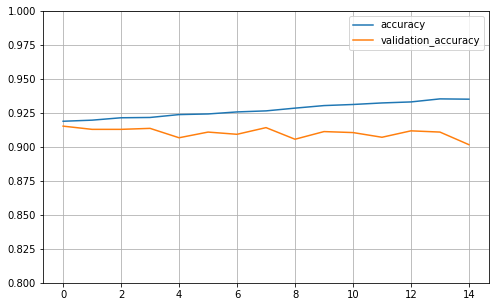

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

hist_accuracy = {'accuracy': history.history['accuracy'], 'validation_accuracy': history.history['val_accuracy']}
pd.DataFrame(hist_accuracy).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.8, 1)  # set the vertical range to [0, 1]

The train and validation errors are not computed in the same way, which may be misleading. While the train error is computed as a running mean of the batches within each epoch, the validation error is computed at the end of each epoch on the validation set.

In [73]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 613us/step - loss: 0.3383 - accuracy: 0.8799


[0.33828675746917725, 0.8798999786376953]

#### Make predictions

In [74]:
X_new = X_test[:3]

In [81]:
y_proba = model.predict(X_new)

In [82]:
type(y_proba)

numpy.ndarray

In [84]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
        0.998],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

To directly choose the largest probability to do classification, you can use `predict_classes` instead:

In [89]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred

array([9, 2, 1])

In [90]:
np.array(class_names)[y_pred]

array(['Ankle Boat', 'Pullover', 'Trouser'], dtype='<U11')

Let's check these images:

In [91]:
np.array(class_names)[y_test[:3]]

array(['Ankle Boat', 'Pullover', 'Trouser'], dtype='<U11')

## Regression MLP using the Sequential API

In [92]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [93]:
housing = fetch_california_housing()

In [97]:
type(housing.data), type(housing.target)

(numpy.ndarray, numpy.ndarray)

In [98]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
  housing.data, housing.target
)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [100]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Differences w.r.t. Neural Network for classification:
- Output, single neuron with no activation function
- Need to change the loss function to `mean_squared_error`, for example
- Since dataset is quite noisy, try to use fewer neurons to avoid overfitting

In [107]:
model = keras.models.Sequential([
    keras.layers.Dense(20, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

In [108]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [109]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Epoch 1/15
363/363 [==============================] - 0s 768us/step - loss: 0.8327 - val_loss: 0.6541
Epoch 2/15
363/363 [==============================] - 0s 584us/step - loss: 0.4911 - val_loss: 0.5394
Epoch 3/15
363/363 [==============================] - 0s 590us/step - loss: 0.4396 - val_loss: 0.6589
Epoch 4/15
363/363 [==============================] - 0s 608us/step - loss: 0.4272 - val_loss: 0.6417
Epoch 5/15
363/363 [==============================] - 0s 589us/step - loss: 0.4079 - val_loss: 0.4158
Epoch 6/15
363/363 [==============================] - 0s 597us/step - loss: 0.3907 - val_loss: 0.4027
Epoch 7/15
363/363 [==============================] - 0s 628us/step - loss: 0.3820 - val_loss: 0.3835
Epoch 8/15
363/363 [==============================] - 0s 592us/step - loss: 0.3756 - val_loss: 0.3802
Epoch 9/15
363/363 [==============================] - 0s 617us/step - loss: 0.3747 - val_loss: 0.3769
Epoch 10/15
363/363 [==============================] - 0s 606us/step - loss: 0.368

In [111]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 439us/step - loss: 0.3607


0.36069419980049133

In [112]:
X_new = X_test[:3]

In [113]:
model.predict(X_new), y_test[:3]

(array([[1.8898067],
        [1.0986954],
        [1.0035229]], dtype=float32),
 array([1.928, 0.929, 0.738]))

In [121]:
y_test = y_test.reshape(-1, 1) 

In [122]:
y_pred.shape, y_test.shape

((5160, 1), (5160, 1))

In [123]:
y_pred = model.predict(X_test)

In [124]:
abs_error = np.abs(y_pred - y_test) / y_test

In [127]:
abs_error[:5]

array([[0.01980978],
       [0.18266458],
       [0.35978709],
       [0.09721315],
       [0.35332399]])

In [129]:
100*np.median(abs_error), 100*np.mean(abs_error)

(17.216746007920683, 24.840768853249642)

In [134]:
def get_abs_error(y_pred, y_test):
    abs_error = np.abs(y_pred - y_test) / y_test
    return 100*np.median(abs_error), 100*np.mean(abs_error)

## Build Complex Models using the Functional API

We are going to build a Wide & Deep Neural Network. The idea is to have a layer before the output layer where we concatenate the inputs and the result of a deep neural network. This allows to have simple and deep patterns in the same neural network at the same time.

In [136]:
input_ = keras.layers.Input(shape=X_train.shape[1:])  # describes input (e.g. shape and dtype)
hidden1 = keras.layers.Dense(30, activation="relu")(input_)  # notice how we pass the input as an argument!
hidden2 = keras.layers.Dense(10, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [137]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 10)           310         dense_16[0][0]                   
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 18)           0           input_2[0][0]                    
                                                                 dense_17[0][0]             

In [138]:
model.compile(loss="mean_squared_error", optimizer="sgd")
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 834us/step - loss: 1.0009 - val_loss: 7.7643
Epoch 2/20
363/363 [==============================] - 0s 682us/step - loss: 0.6227 - val_loss: 1.3954
Epoch 3/20
363/363 [==============================] - 0s 659us/step - loss: 0.5029 - val_loss: 1.0457
Epoch 4/20
363/363 [==============================] - 0s 687us/step - loss: 0.4532 - val_loss: 0.4398
Epoch 5/20
363/363 [==============================] - 0s 666us/step - loss: 0.4129 - val_loss: 0.4243
Epoch 6/20
363/363 [==============================] - 0s 658us/step - loss: 0.4043 - val_loss: 0.4427
Epoch 7/20
363/363 [==============================] - 0s 668us/step - loss: 0.4087 - val_loss: 0.3918
Epoch 8/20
363/363 [==============================] - 0s 670us/step - loss: 0.3857 - val_loss: 0.3999
Epoch 9/20
363/363 [==============================] - 0s 661us/step - loss: 0.3701 - val_loss: 0.3754
Epoch 10/20
363/363 [==============================] - 0s 672us/step - loss: 0.363

In [139]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 700us/step - loss: 0.3477


0.3476766347885132

In [140]:
get_abs_error(model.predict(X_test), y_test)

(16.6571113392156, 24.197662874212607)

The results stay more or less unchanged.

## Using Tensorboard for Visualisation

First step is defining the root log directory:

In [143]:
import os
import time
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [147]:
run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2021_06_26-18_57_26'

Now we are ready to use the Tensorboard callback:

In [152]:
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2782 - val_loss: 0.3053
Epoch 2/30
363/363 [==============================] - 0s 687us/step - loss: 0.2796 - val_loss: 0.3080
Epoch 3/30
363/363 [==============================] - 0s 674us/step - loss: 0.2789 - val_loss: 0.3075
Epoch 4/30
363/363 [==============================] - 0s 653us/step - loss: 0.2781 - val_loss: 0.4788
Epoch 5/30
363/363 [==============================] - 0s 676us/step - loss: 0.2804 - val_loss: 0.3507
Epoch 6/30
363/363 [==============================] - 0s 660us/step - loss: 0.2773 - val_loss: 0.3517
Epoch 7/30
363/363 [==============================] - 0s 670us/step - loss: 0.2915 - val_loss: 0.3120
Epoch 8/30
363/363 [==============================] - 0s 664us/step - loss: 0.2779 - val_loss: 0.3623
Epoch 9/30
363/363 [==============================] - 0s 670us/step - loss: 0.2843 - val_loss: 0.3059
Epoch 10/30
363/363 [==============================] - 0s 691us/step - loss: 0.2768 

In [153]:
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir())
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=10**(-2)))
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30


/Users/jmontero/.Envs/ml/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


363/363 [==============================] - 1s 938us/step - loss: 0.2749 - val_loss: 0.3016
Epoch 2/30
363/363 [==============================] - 0s 694us/step - loss: 0.2736 - val_loss: 0.2984
Epoch 3/30
363/363 [==============================] - 0s 676us/step - loss: 0.2727 - val_loss: 0.3127
Epoch 4/30
363/363 [==============================] - 0s 670us/step - loss: 0.2730 - val_loss: 0.3013
Epoch 5/30
363/363 [==============================] - 0s 664us/step - loss: 0.2730 - val_loss: 0.3015
Epoch 6/30
363/363 [==============================] - 0s 682us/step - loss: 0.2755 - val_loss: 0.3481
Epoch 7/30
363/363 [==============================] - 0s 660us/step - loss: 0.2725 - val_loss: 0.3001
Epoch 8/30
363/363 [==============================] - 0s 667us/step - loss: 0.2722 - val_loss: 0.3048
Epoch 9/30
363/363 [==============================] - 0s 643us/step - loss: 0.2725 - val_loss: 0.3106
Epoch 10/30
363/363 [==============================] - 0s 662us/step - loss: 0.2715 - val_los

We can even run Tensorboard directly from this notebook!

In [154]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [155]:
%tensorboard --logdir='./my_logs' --port=6006

Reusing TensorBoard on port 6006 (pid 8861), started 0:02:00 ago. (Use '!kill 8861' to kill it.)